### Análisis de un dataset de Spotify: las características musicales de las canciones y la relación con su popularidad 

En este notebook se realizará un análisis del dataset 🎹 Spotify Tracks, obtenido en Kaggle, para determinar si se cumple la siguiente hipótesis: *las canciones más populares comparten características musicales*.

#### Importación de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

#### Carga del dataset

In [2]:
file = r"C:\Users\Evelyn\Documents\Evelyn\Learning\BCN Activa\Data Analysis\Sprint10\Análisis DB Spotify\dataset.csv"

df = pd.read_csv(file)
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


#### Exploración del dataframe

In [3]:
df.shape

(114000, 21)

In [4]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
df.tail()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.235,...,-16.393,1,0.0422,0.640,0.928,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.117,...,-18.318,0,0.0401,0.994,0.976,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,...,-10.895,0,0.0420,0.867,0.000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,...,-10.889,1,0.0297,0.381,0.000,0.2700,0.4130,135.960,4,world-music
113999,113999,2hETkH7cOfqmz3LqZDHZf5,Cesária Evora,Miss Perfumado,Barbincor,22,241826,False,0.526,0.487,...,-10.204,0,0.0725,0.681,0.000,0.0893,0.7080,79.198,4,world-music


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [7]:
df.nunique()

Unnamed: 0          114000
track_id             89741
artists              31437
album_name           46589
track_name           73608
popularity             101
duration_ms          50697
explicit                 2
danceability          1174
energy                2083
key                     12
loudness             19480
mode                     2
speechiness           1489
acousticness          5061
instrumentalness      5346
liveness              1722
valence               1790
tempo                45653
time_signature           5
track_genre            114
dtype: int64

In [8]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [9]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

#### Limpieza

In [11]:
df = df.drop('Unnamed: 0', axis=1)

In [12]:
null_filter = df.isnull().any(axis=1)
null_tracks = df[null_filter]

null_tracks

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [13]:
df = df.dropna()
df.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Aunque no hay verdaderos duplicados, al ordenar por popularidad los tracks, se ven registros casi idénticos, en los que la única variable diferente es *track_genre*

In [14]:
df.sort_values(by='popularity', ascending=False).head(25)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,dance
81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,pop
51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,4,hip-hop
88410,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,reggae
30003,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,edm
68303,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,latino
89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,reggaeton
81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,pop
67356,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,latin
20008,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,dance


La columna *track_genre* se descartará, ya que no está ligada al track sino al artista, por lo que genera duplicados. Además, por estar ligada al artista, esta variable no aporta información sobre el track, más bien la distorsiona.

In [15]:
df_tracks = df.drop('track_genre', axis=1)

df_tracks.duplicated().sum()

np.int64(23539)

In [16]:
df_tracks.drop_duplicates(inplace=True)
df_tracks.duplicated().sum()

np.int64(0)

Como suele haber canciones que aparecen en más de un álbum, se verifican otra vez los duplicados, esta vez utilizando las variables *track_name* y *artists* y contando cuántas veces aparecen en el dataframe. Luego se eliminan los duplicados.

In [17]:
(df_tracks.groupby(['track_name', 'artists'])
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
    .head(15)
)

,track_name,artists,count
55084,Rockin' Around The Christmas Tree,Brenda Lee,45
37981,Little Saint Nick - 1991 Remix,The Beach Boys,42
55570,Run Rudolph Run,Chuck Berry,41
23998,Frosty The Snowman,Ella Fitzgerald,34
37090,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,32
42561,Mistletoe,Justin Bieber,31
59376,Sleigh Ride,Ella Fitzgerald,30
30348,I Saw Mommy Kissing Santa Claus,The Jackson 5,27
36539,Last Last,Burna Boy,26
64803,The Christmas Song (Merry Christmas To You),Nat King Cole,26


In [18]:
df_tracks = df_tracks.sort_values(by='popularity', ascending=False)
df_tracks = df_tracks.drop_duplicates(['track_name', 'artists']).sort_index()

(df_tracks.groupby(['track_name', 'artists'])
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
    .head()
)

,track_name,artists,count
81342,행복하길 바래,Lim Hyung Joo,1
0,!I'll Be Back!,Rilès,1
1,"""A"" You're Adorable",Brian Hyland,1
2,"""C"" IS FOR COOKIE",Little Apple Band,1
3,"""C"" is for Cookie",Little Apple Band,1


In [19]:
# se reordenan las columnas por comodidad
df_tracks = df_tracks[[
    'track_id',
    'artists',
    'album_name',
    'track_name',
    'popularity',
    'duration_ms',
    'danceability',
    'energy',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'loudness',
    'tempo',
    'time_signature',
    'key',
    'mode',
    'explicit'
    ]]


df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81343 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          81343 non-null  object 
 1   artists           81343 non-null  object 
 2   album_name        81343 non-null  object 
 3   track_name        81343 non-null  object 
 4   popularity        81343 non-null  int64  
 5   duration_ms       81343 non-null  int64  
 6   danceability      81343 non-null  float64
 7   energy            81343 non-null  float64
 8   speechiness       81343 non-null  float64
 9   acousticness      81343 non-null  float64
 10  instrumentalness  81343 non-null  float64
 11  liveness          81343 non-null  float64
 12  valence           81343 non-null  float64
 13  loudness          81343 non-null  float64
 14  tempo             81343 non-null  float64
 15  time_signature    81343 non-null  int64  
 16  key               81343 non-null  int64  
 1

#### EDA

##### Popularity
Se comienza por analizar la distribución de *popularity* que es la variable central de la hipótesis.

"La popularidad de un track es un valor de entre 0 y 100, siendo 100 el más popular. La popularidad es calculada por un algoritmo y se basa, mayormente, en la cantidad de reproducciones que ha tenido el track y qué tan recientes fueron esas reproducciones." - Definición de Spotify

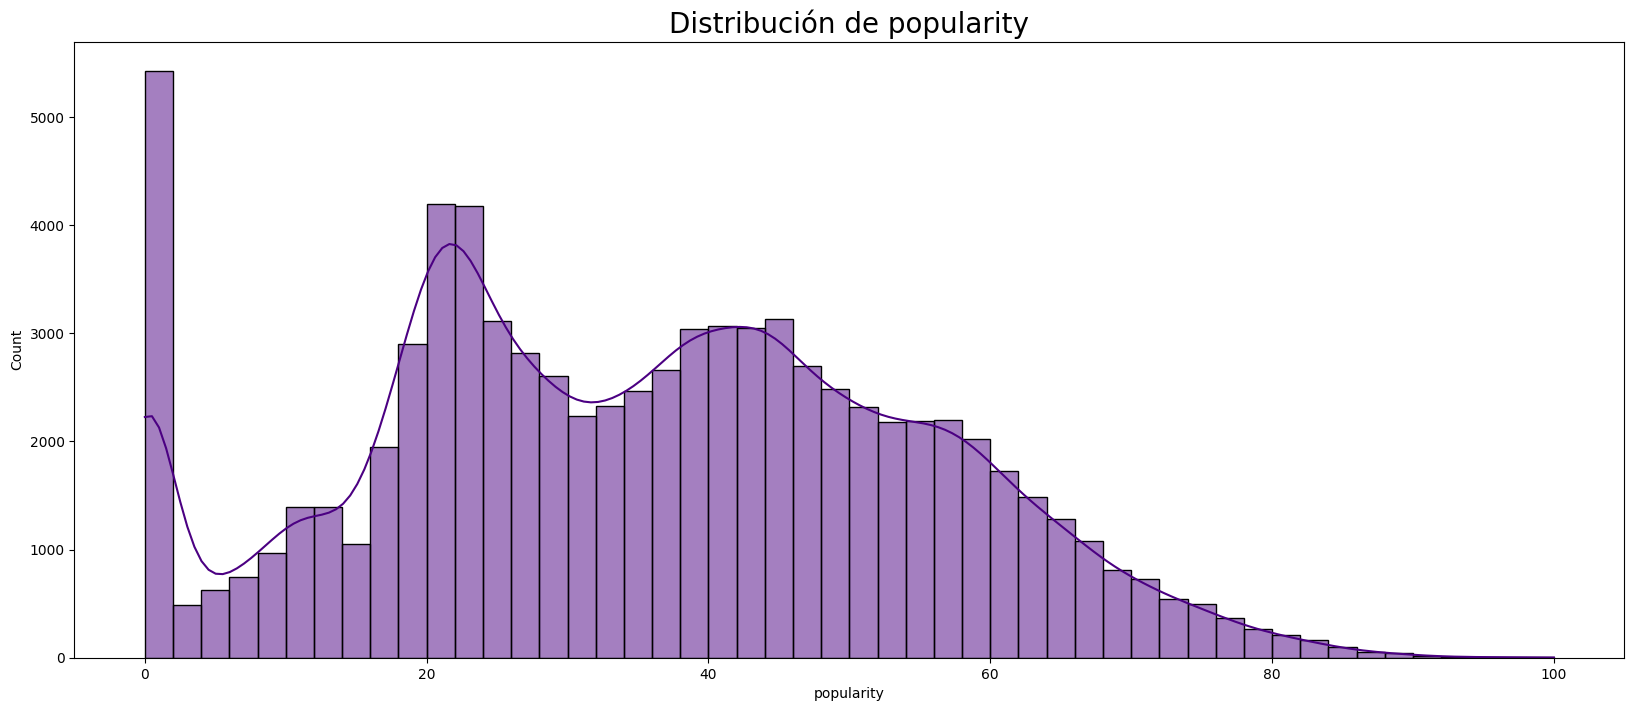

In [20]:
plt.figure(figsize=(20, 8))

sns.histplot(df_tracks['popularity'], bins=50, kde=True, color='indigo')

plt.title('Distribución de popularity', fontsize=20)
plt.show();

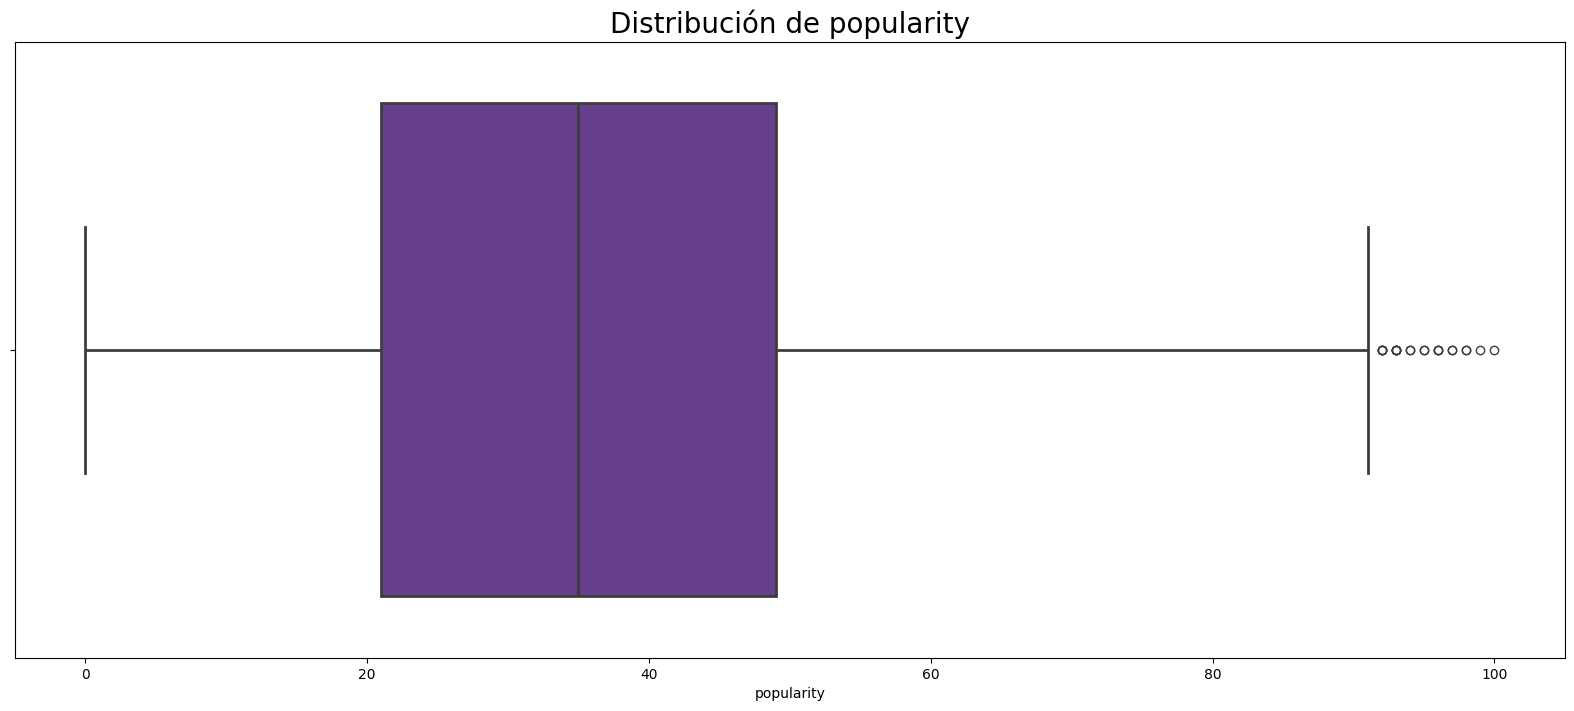

In [21]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.boxplot(data=df_tracks, x='popularity', color='rebeccapurple', linewidth=2)

plt.title('Distribución de popularity', fontsize=20)
plt.show();

Aunque se observa que la distribución está segada a la izquierda, debido a la gran cantidad de registros con valor 0, y la existencia de outliers en los valores más altos, se decide no hacer cambios en esta variable, ya que esta distribución desequilibrada es debido a la forma en que Spotify valora la popularidad de cada track.

##### Correlación de variables numéricas

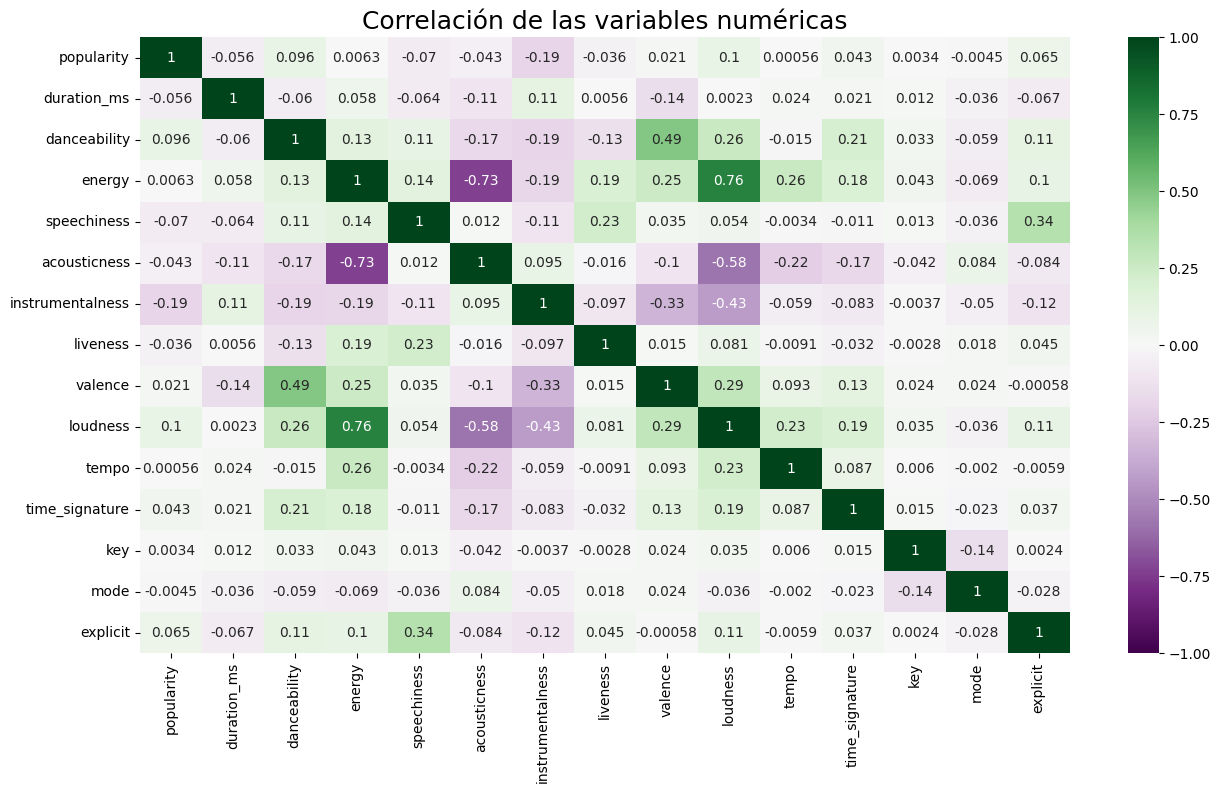

In [22]:
plt.figure(figsize=(15, 8))

sns.heatmap(df_tracks.corr(numeric_only=True), vmin= -1, vmax=1, annot=True, cmap='PRGn')

plt.title('Correlación de las variables numéricas', fontsize=18)
plt.show();

La variable *popularity* no parece tener correlación con las demás, casi todos los valores tienden a 0.

Sí se observan una correlación entre la variable *loudness* y *energy* (lo que tiene sentido, son el volumen y la energía o intensidad de un track), y una correlación inversa entre *energy* y *acousticness* (si el track es acústico, tiene menos energía).

Otras correlaciones menos pronunciadas ocurren entre variables que también se pensaría que están relacionadas: *valence* (cuando más alto el valor, más positivo es el track) y *danceability* (cuando más alto, más bailable), entre otras.

##### Distribución de todas las variables numéricas

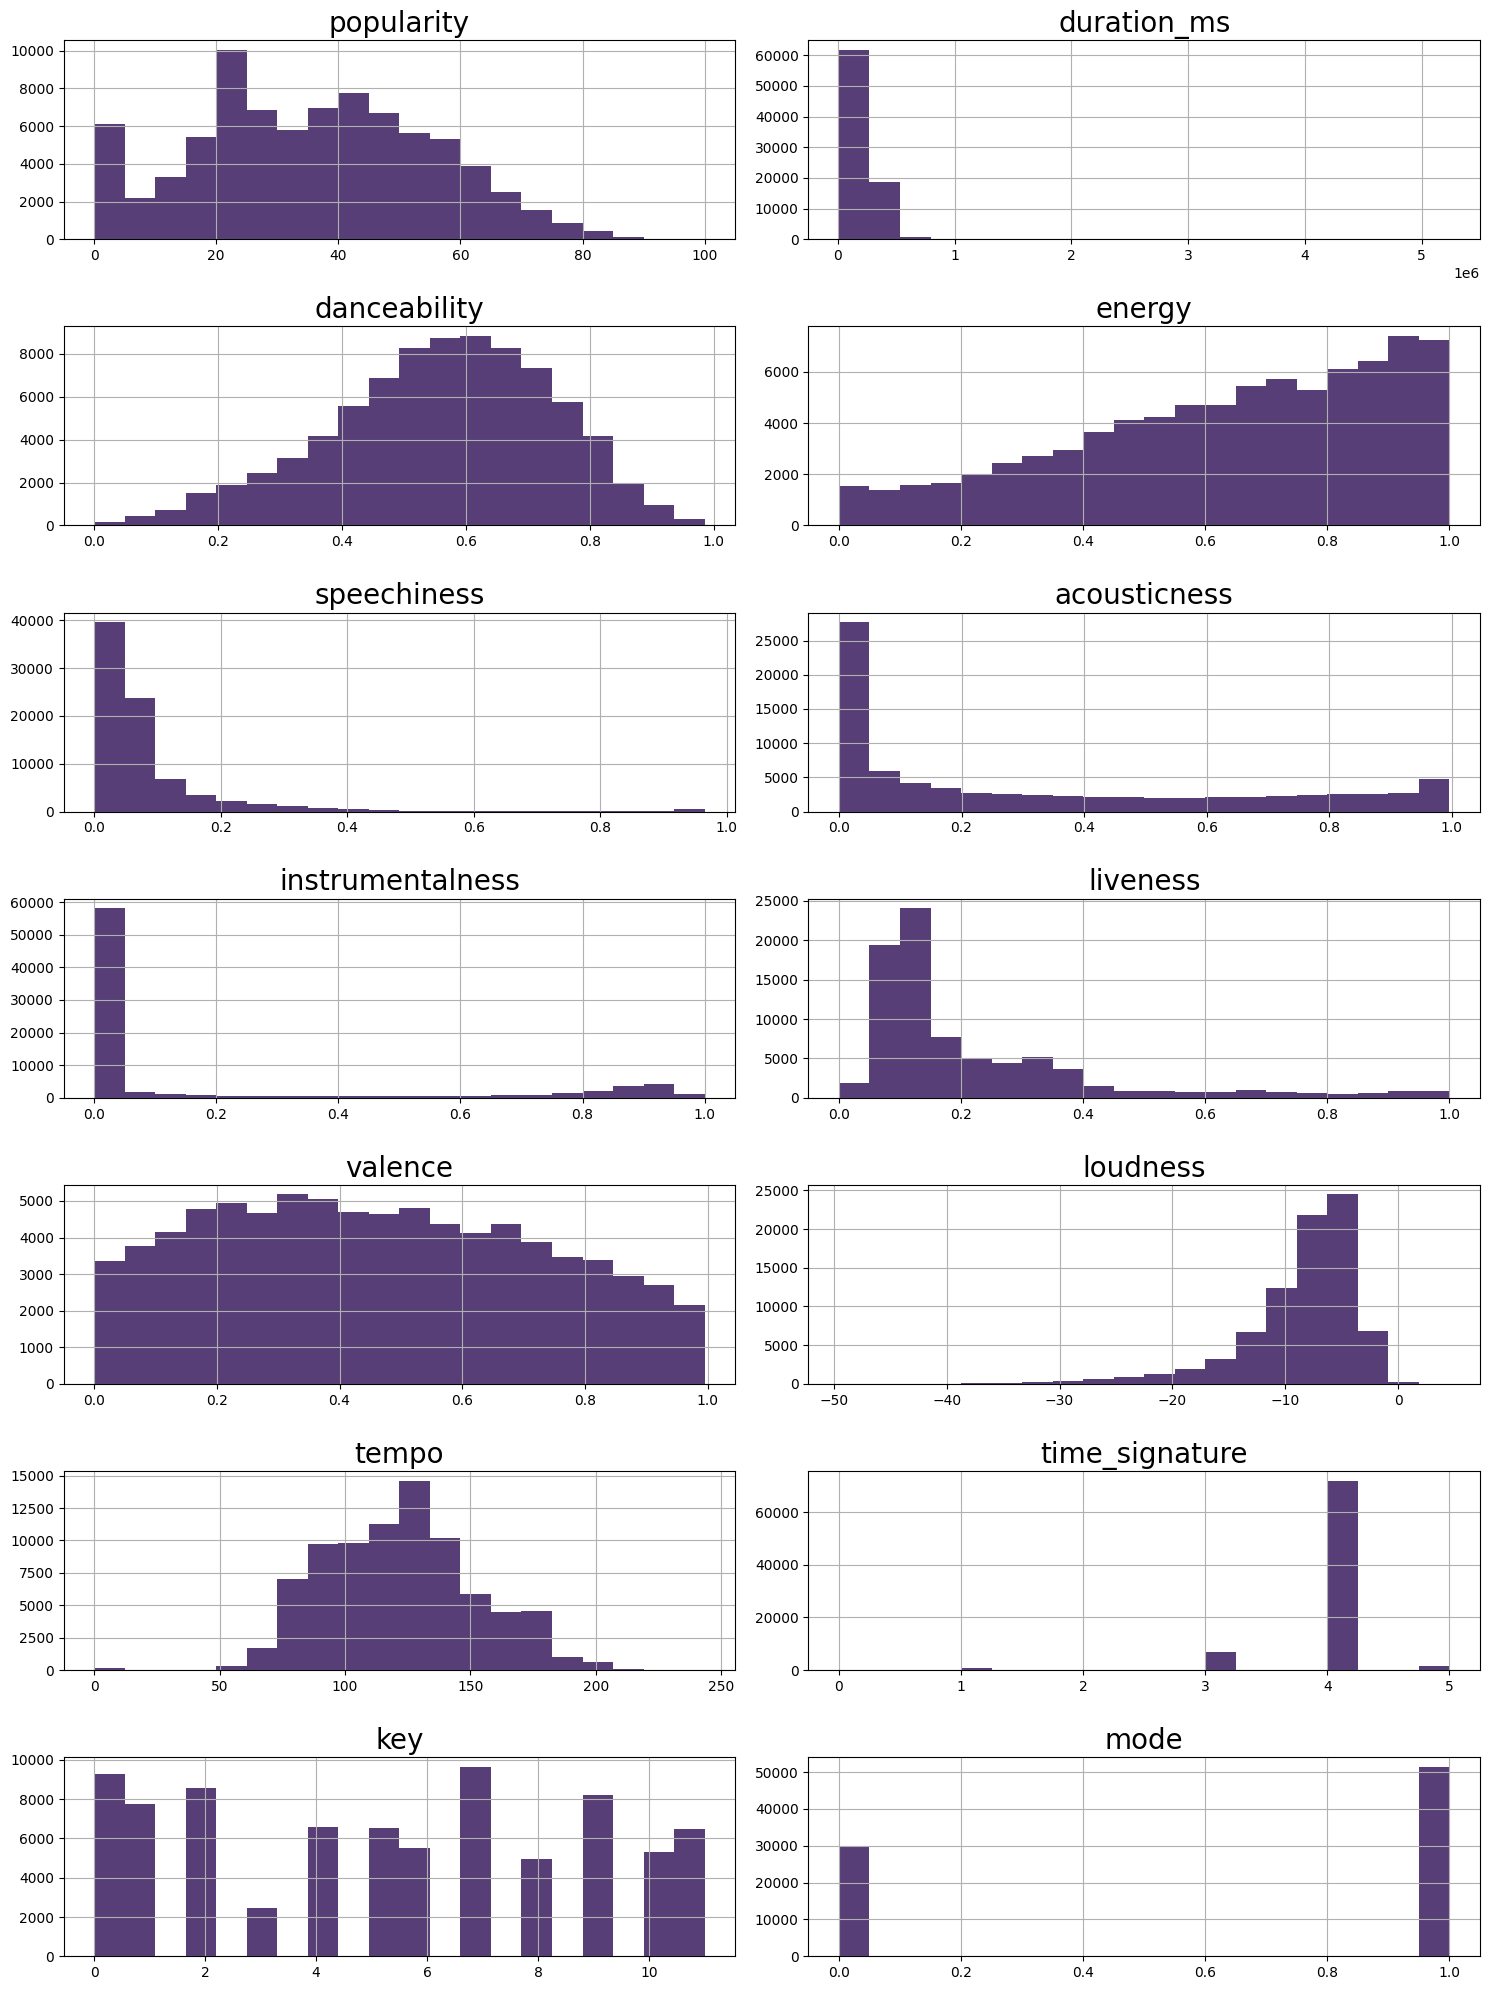

In [23]:
fig, ax = plt.subplots(nrows=7,ncols=2, figsize=(15,20))

df_tracks.hist(bins=20, color='#583e76', ax=ax)

for i in ax.flatten():
    if i.get_title():
        i.set_title(i.get_title(), fontsize=20)


plt.tight_layout()
plt.show();

##### Duration

La variable *duration_ms* (duración en milisegundos) tiene un sesgo a la izquierda demasiado prounciado, probablemente haya algunos tracks muy largos que sean más la excepción que la norma. Se convierten a minutos los valores para una mejor comprensión de la duración.

Se analiza el histograma a escala más grande y se realiza un boxplot.

In [24]:
df_tracks['duration_ms'].describe()

count    8.134300e+04
mean     2.313959e+05
std      1.164740e+05
min      8.586000e+03
25%      1.738660e+05
50%      2.152000e+05
75%      2.673330e+05
max      5.237295e+06
Name: duration_ms, dtype: float64

In [25]:
def duration_describe(duration_ms):
    mean_ms = duration_ms.mean()
    min_ms = duration_ms.min()
    max_ms = duration_ms.max()

    def ms_to_time(ms):
        seconds = int(ms/1000) % 60
        minutes = int(ms/60000)
        if seconds < 10:
            seconds = f'0{seconds}'
        return f'{minutes}:{seconds}'

    mean_duration = ms_to_time(mean_ms)
    min_duration = ms_to_time(min_ms)
    max_duration = ms_to_time(max_ms)

    print(f'Duración media: {mean_duration}\nDuración mínima: {min_duration}\nDuración máxima: {max_duration}')

duration_describe(df_tracks['duration_ms'])

Duración media: 3:51
Duración mínima: 0:08
Duración máxima: 87:17


C:\Users\Evelyn\AppData\Local\Temp\ipykernel_6704\3400773777.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])


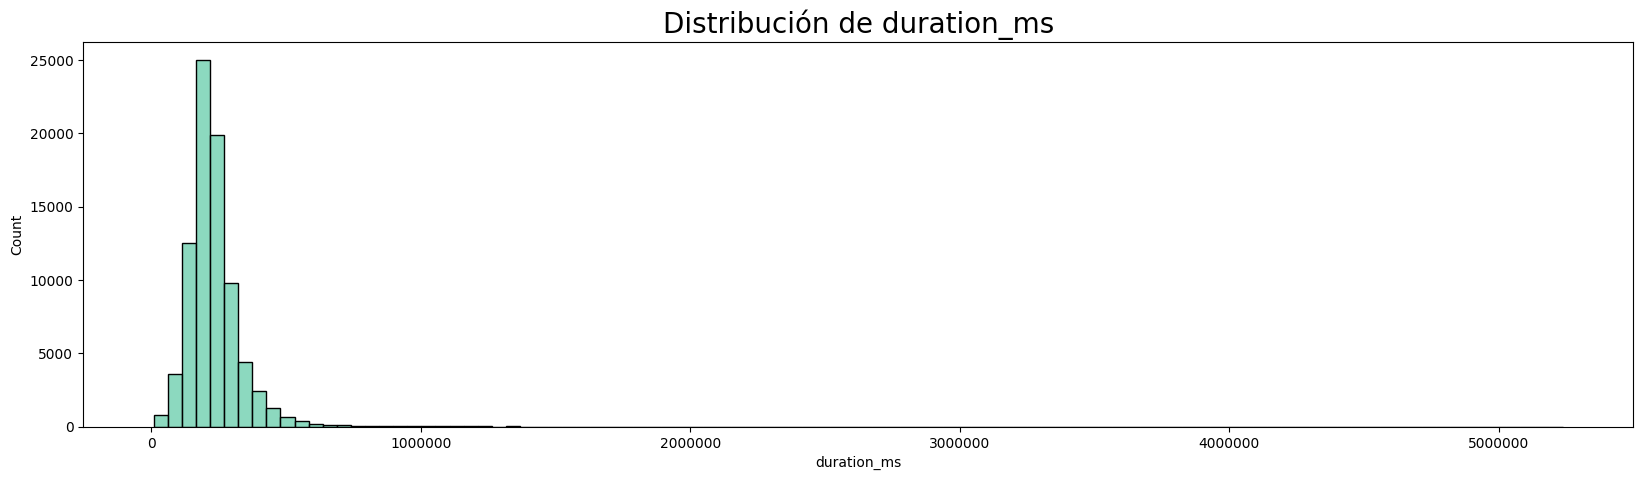

In [26]:
plt.figure(figsize=(20,5))

sns.histplot(df_tracks['duration_ms'], bins=100, color='mediumaquamarine')

current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])
plt.title('Distribución de duration_ms', fontsize=20)
plt.show();

C:\Users\Evelyn\AppData\Local\Temp\ipykernel_6704\2851855901.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])


<Figure size 2000x500 with 0 Axes>

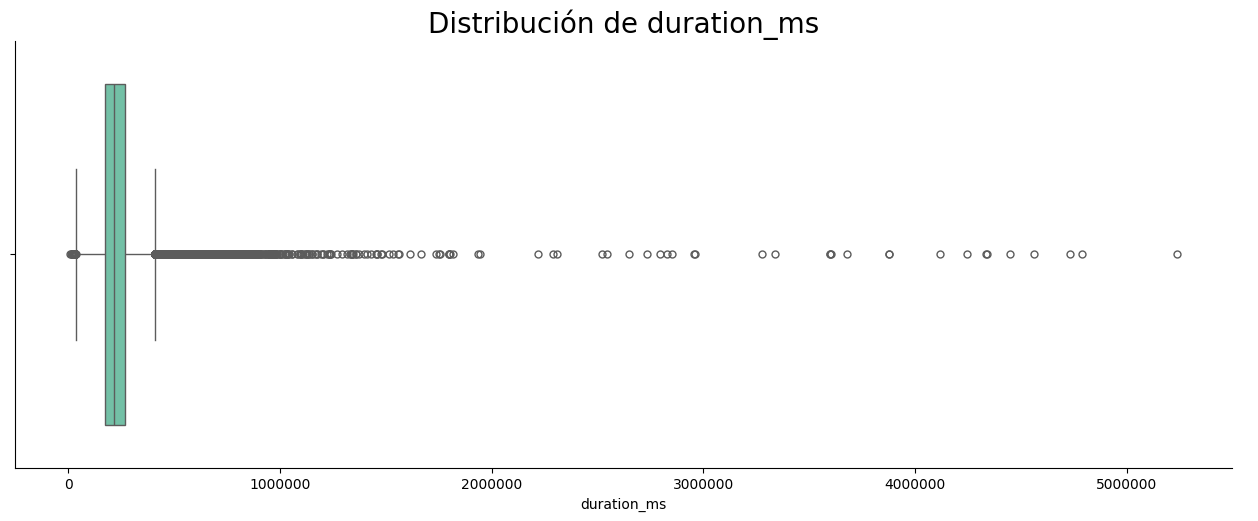

In [27]:
plt.figure(figsize=(20,5))

sns.catplot(data = df_tracks, x = 'duration_ms', kind = 'box', color='mediumaquamarine', height=5, aspect=2.5)

current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])
plt.title('Distribución de duration_ms', fontsize=20)
plt.show();

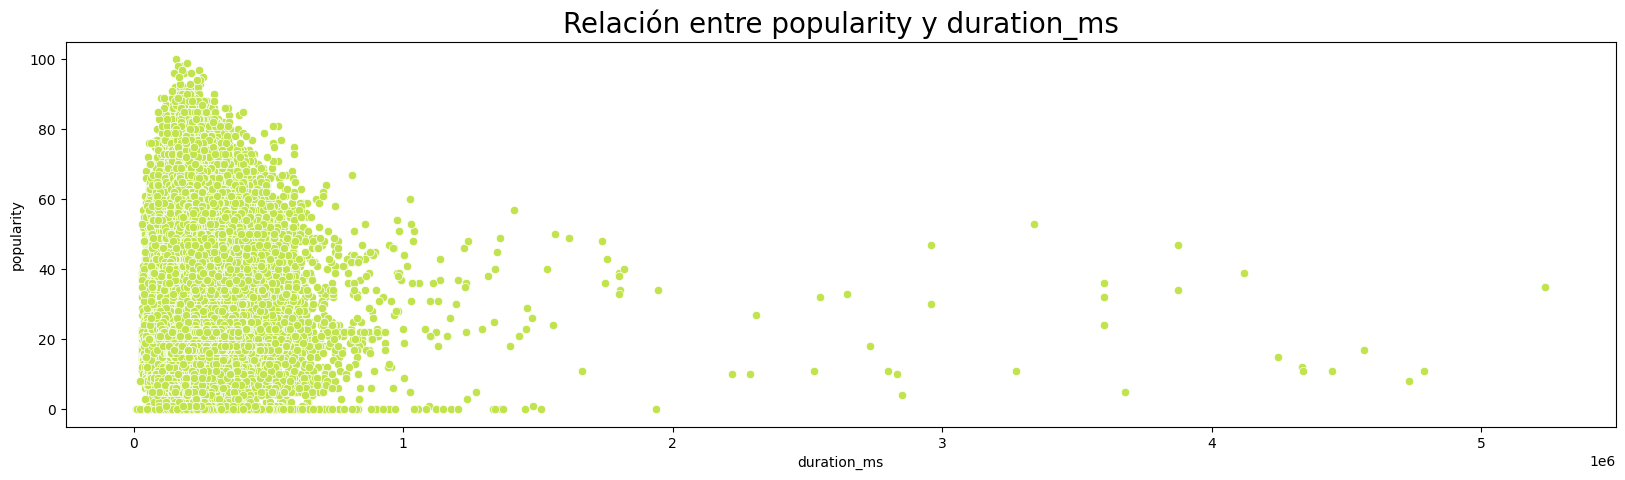

In [28]:
plt.figure(figsize=(20,5))

sns.scatterplot(data=df_tracks, x='duration_ms', y='popularity', color='#c1e44e')

plt.title('Relación entre popularity y duration_ms', fontsize=20)
plt.show();

Se quitan los outliers de *duration_ms*

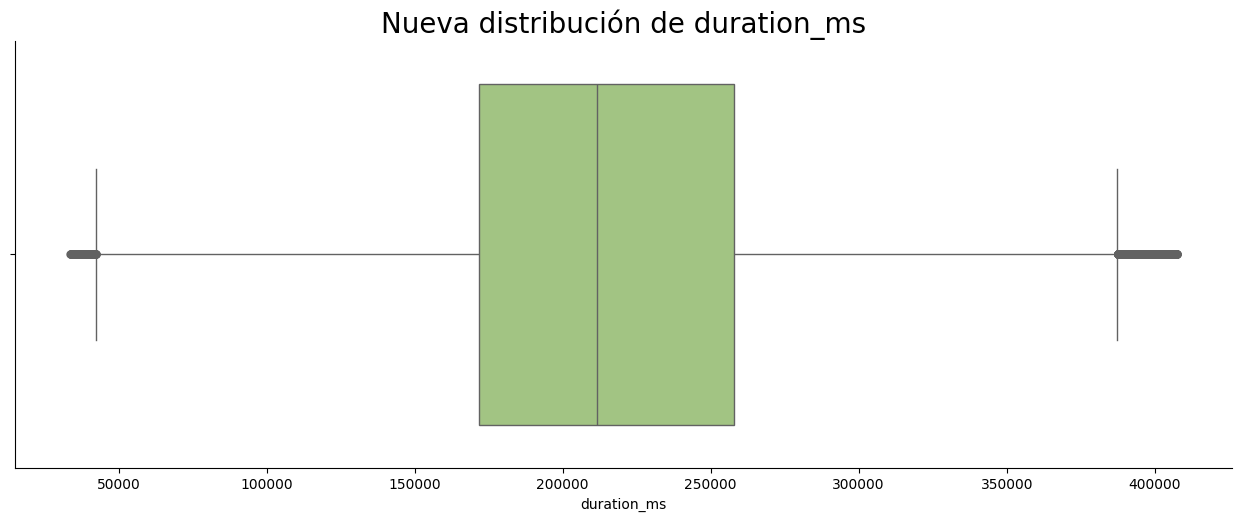

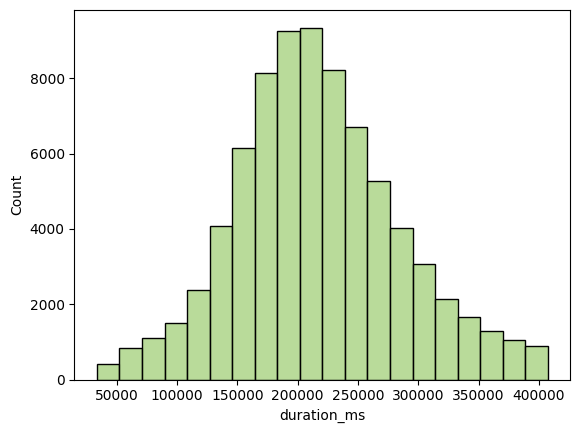

In [29]:
Q1 = df_tracks['duration_ms'].quantile(0.25)
Q3 = df_tracks['duration_ms'].quantile(0.75)
IQR = Q3 - Q1   

remove_outliers = (df_tracks['duration_ms'] >= Q1 - 1.5 * IQR) & (df_tracks['duration_ms'] <= Q3 + 1.5 *IQR)
df_tracks = df_tracks.loc[remove_outliers]

sns.catplot(data = df_tracks, x = 'duration_ms', kind = 'box', color='#a2cf78', height=5, aspect=2.5)

plt.title('Nueva distribución de duration_ms', fontsize=20)
plt.show();

sns.histplot(df_tracks['duration_ms'], bins=20, color='#a2cf78');

In [30]:
print(f'El nuevo dataframe tiene {df_tracks.shape[0]} registros')

El nuevo dataframe tiene 77562 registros


In [31]:
duration_describe(df_tracks['duration_ms'])

Duración media: 3:36
Duración mínima: 0:33
Duración máxima: 6:47


##### Segmentación de popularity
Se divide el dataframe en tres grupos, los dos cuantiles extremos y un grupo del mismo tamaño alrededor de la mediana, para luego contrastar las variaciones de las demás variables en esos intervalos.

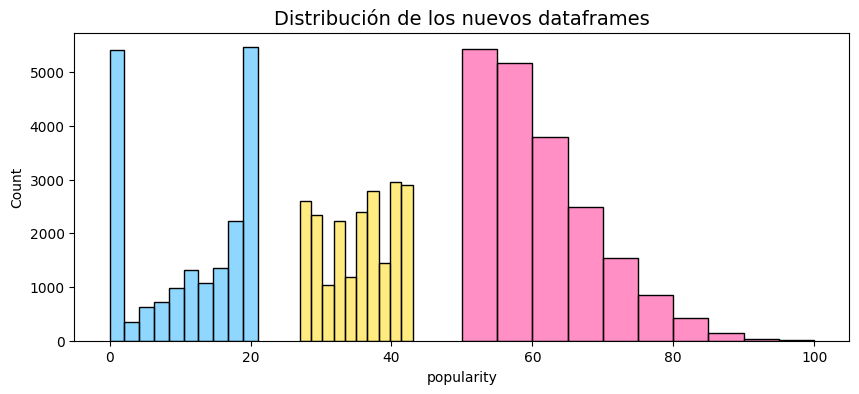

In [32]:
Q3 = df_tracks['popularity'].quantile(0.75)
Q1 = df_tracks['popularity'].quantile(0.25)
Q25 = df_tracks['popularity'].quantile(0.625)
Q15 = df_tracks['popularity'].quantile(0.375)

most_pop = (df_tracks['popularity'] >= Q3)
df_most_pop = df_tracks.loc[most_pop]

avg_pop = (df_tracks['popularity'] <= Q25) & (df_tracks['popularity'] >= Q15)
df_avg_pop = df_tracks.loc[avg_pop]

least_pop = (df_tracks['popularity'] <= Q1)
df_least_pop = df_tracks.loc[least_pop]

plt.figure(figsize=(10,4))

sns.histplot(df_most_pop['popularity'], bins=10, color='#FF218C', alpha=0.5)
sns.histplot(df_avg_pop['popularity'], bins=10, color='#ffd800', alpha=0.5)
sns.histplot(df_least_pop['popularity'], bins=10, color='#21b1ff', alpha=0.5)

plt.title('Distribución de los nuevos dataframes', fontsize=14)
plt.show();

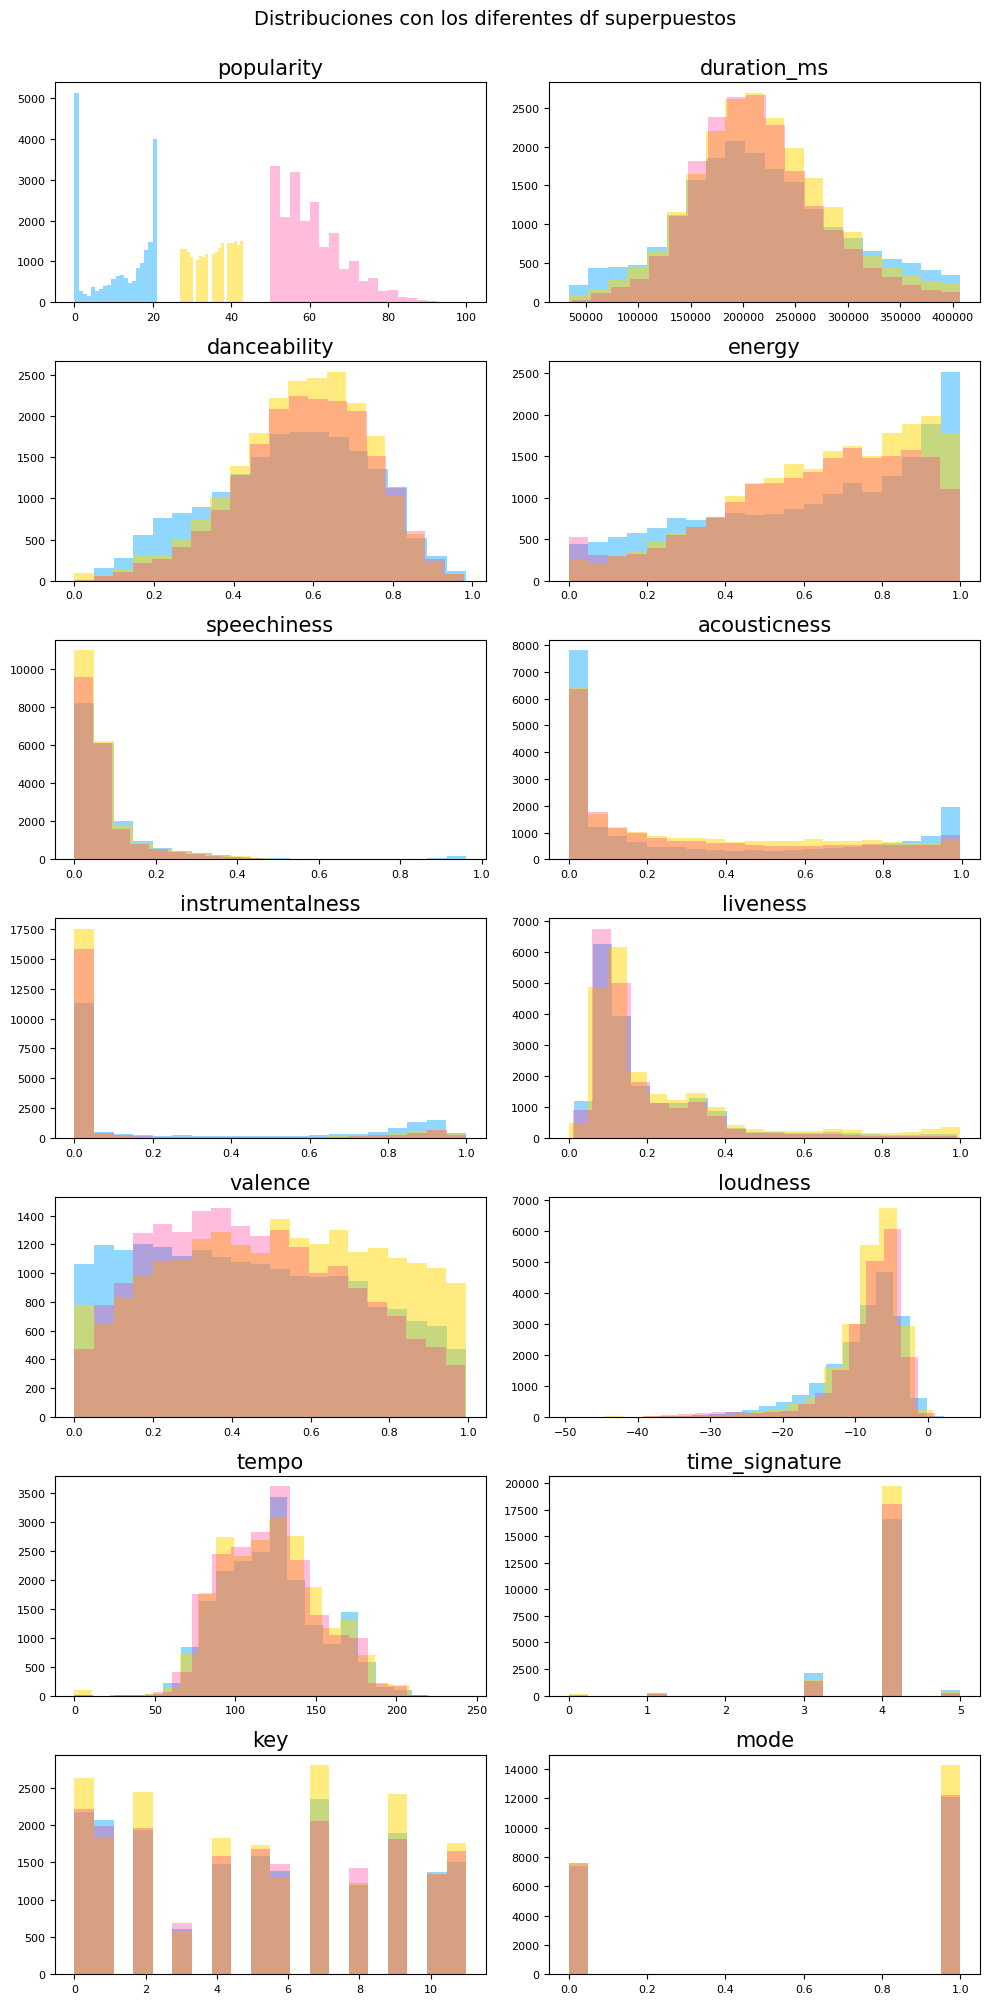

In [33]:
num_histograms = 14

num_rows = 3
num_cols = 5

df_num_most_pop = df_most_pop.select_dtypes(include=['number'])
df_num_avg_pop = df_avg_pop.select_dtypes(include=['number'])
df_num_least_pop = df_least_pop.select_dtypes(include=['number'])

fig, axes = plt.subplots(7,2, figsize=(10, 20))

axes_flat = axes.flatten()


for i, (column, ax) in enumerate(zip(df_num_least_pop.columns, axes_flat)):
    df_num_least_pop[column].plot.hist(ax=ax, bins=20, alpha=0.5, color='#21b1ff')  
    ax.set_ylabel('')

for i, (column, ax) in enumerate(zip(df_num_avg_pop.columns, axes_flat)):
    df_num_avg_pop[column].plot.hist(ax=ax, bins=20, alpha=0.5, color='#ffd800')  
    ax.set_ylabel('')

for i, (column, ax) in enumerate(zip(df_num_most_pop.columns, axes_flat)):
    df_num_most_pop[column].plot.hist(ax=ax, bins=20, alpha=0.3, color='#FF218C')  
    ax.set_title(f'{column}', fontsize=15)
    # ax.set_yticks([])
    ax.set_ylabel('')
    ax.tick_params(labelsize=8)

# elimina los fig que sobran en el grid
if i < num_histograms - 1:
    for j in range(i + 1, num_histograms):
        fig.delaxes(axes_flat[j])
    
fig.suptitle('Distribuciones con los diferentes df superpuestos', fontsize=14, y=1)
plt.tight_layout()
plt.show()

Las distibuciones no parecen cambiar de forma significativa. Se vuelve a graficar las correlaciones, esta vez de cada dataframe segmentado con las demás variables.

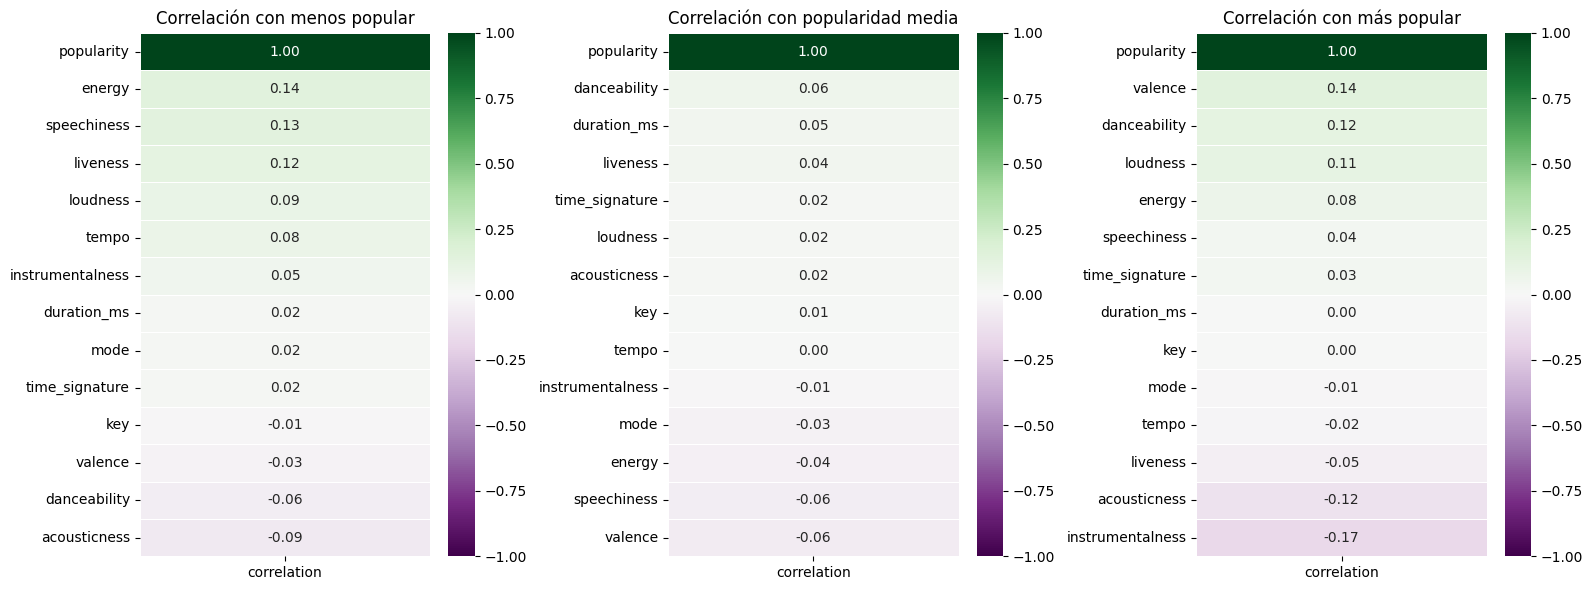

In [34]:
plt.figure(figsize=(16, 6))

corr_least = df_num_least_pop.corrwith(df_num_least_pop['popularity']).sort_values(ascending=False)
plt.subplot(1, 3, 1)
sns.heatmap(pd.DataFrame(corr_least , columns=['correlation']), annot=True, vmin= -1, cmap='PRGn', fmt=".2f", linewidths=.5)
plt.title('Correlación con menos popular')

corr_avg = df_num_avg_pop.corrwith(df_num_avg_pop['popularity']).sort_values(ascending=False)
plt.subplot(1, 3, 2)
sns.heatmap(pd.DataFrame(corr_avg , columns=['correlation']), annot=True, vmin= -1, cmap='PRGn', fmt=".2f", linewidths=.5)
plt.title('Correlación con popularidad media')

corr_most = df_num_most_pop.corrwith(df_num_most_pop['popularity']).sort_values(ascending=False)
plt.subplot(1, 3, 3)
sns.heatmap(pd.DataFrame(corr_most , columns=['correlation']), annot=True, vmin= -1, cmap='PRGn', fmt=".2f", linewidths=.5)
plt.title('Correlación con más popular')

plt.tight_layout()
plt.show();

Las correlaciones entre los diferentes segmentos de popularidad y las demás variables siguen tendiendo a 0, aunque se detectan pequeñas diferencias.

Por ejemplo, la variable más corelacionada en el segmento menos popular es *speechiness* (que denota tracks hablados, no musicales) y la menos correlacionada es *danceability* (que califica los tracks como bailables o no). Esta última variable pasa a primer lugar en entre los tracks de popularidad media y al segundo lugar entre los tracks más populares.

Sin embargo, estas diferencias, aunque coinciden con lo que se esperaría de forma intuitiva, no representan cifras significativas como para poder confirmar la hipótesis.

#### Exportación
Se exporta la última versión del dataset para realizar visualizaciones en otras herramientas.

In [35]:
df_tracks.to_csv(r"C:\Users\Evelyn\Documents\Evelyn\Learning\BCN Activa\Data Analysis\Sprint10\Análisis DB Spotify\clean_dataset.csv")

In [36]:
df_tracks_sort = df_tracks.sort_values(by='popularity', ascending=False)
df_tracks_top50 = df_tracks_sort.iloc[:50]
df_tracks_top50.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,time_signature,key,mode,explicit
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,0.714,0.472,0.0864,0.01300,0.000005,0.266,0.238,-7.375,131.121,4,2,1,False
51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,0.621,0.782,0.0440,0.01250,0.033000,0.230,0.550,-5.548,128.033,4,2,1,False
67356,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,0.835,0.679,0.0364,0.58300,0.000002,0.218,0.850,-5.329,124.980,4,7,0,False
20008,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,0.561,0.965,0.0343,0.00383,0.000007,0.371,0.304,-3.673,128.040,4,7,0,True
67359,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Un Verano Sin Ti,Tití Me Preguntó,97,243716,0.650,0.715,0.2530,0.09930,0.000291,0.126,0.187,-5.198,106.672,4,5,0,False


In [37]:
df_track_genre = df[['track_id', 'track_genre']]

df_track_genre.to_csv(r"C:\Users\Evelyn\Documents\Evelyn\Learning\BCN Activa\Data Analysis\Sprint10\Análisis DB Spotify\track_genre.csv")

df_track_genre.head()

,track_id,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,acoustic
4,5vjLSffimiIP26QG5WcN2K,acoustic


In [38]:
df_tracks_top50.to_csv(r"C:\Users\Evelyn\Documents\Evelyn\Learning\BCN Activa\Data Analysis\Sprint10\Análisis DB Spotify\top50_dataset.csv")

### Bonus track: recomendador de canciones

Utilizando el algoritmo de k vecinos más cercanos (KNN) se clasifican los tracks según sus variables para obtener recomendaciones de canciones similares.

In [49]:
k = 5
normalizer = MinMaxScaler()
filter_num = [
    'danceability',
    'energy',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo']

normalized_df = normalizer.fit_transform(df_tracks[filter_num])

recom_model = NearestNeighbors(n_neighbors = k, metric = 'cosine')
recom_model.fit(normalized_df)

NearestNeighbors(metric='cosine')

In [51]:
def track_recommendation(track_index, recom_count):
    distances, indices = recom_model.kneighbors([normalized_df[track_index]], n_neighbors=recom_count + 1)
    recommendations = df_tracks.iloc[indices[0][1:]]
    recommendations = recommendations.sort_values('popularity', ascending=False)
    return recommendations[['track_name', 'artists', 'album_name', 'popularity']]

track_recommendation(11016, 5)

# tracks de prueba
# 11016 - Here Comes The Sun - The Beatles
# 20001 - Unholy - Sam Smith, Kim Petras
# 51664 - Quevedo: Bzrp Music Sessions, Vol. 52	- Bizarrap, Quevedo

,track_name,artists,album_name,popularity
13550,Hear The Music,Paul Johnson,Feel The Music,41
13108,I'm Lovin' It,Mark Farina;Homero Espinosa;Kid Enigma,I'm Lovin' It,14
24907,D-Spirit,Delano Smith;Brian Kage,Keep 'em Movin',7
24320,Project 5 - Untitled B1,K-Hand,"Acacia Classics, Vol. 3",7
13769,Feeling Faded,Bad Boy Bill;Nick Risk,Feeling Faded,6
